In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("wine_data.csv", usecols=[0, 1, 2])

# df.columns["Class label", "Alcohol", "Malic acid"]
# could have been ran just to change the col names

<Axes: title={'center': 'Before scaling - pdf of malic acid'}, xlabel='malic_acid', ylabel='Density'>

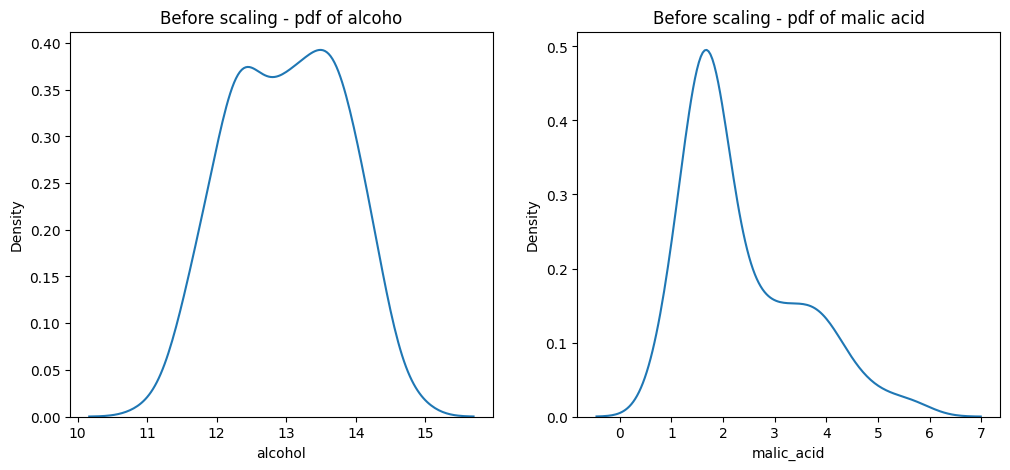

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before scaling - pdf of alcoho")
sns.kdeplot(df["alcohol"], ax=ax1)

ax2.set_title("Before scaling - pdf of malic acid")
sns.kdeplot(df["malic_acid"], ax=ax2)

<Axes: xlabel='alcohol', ylabel='malic_acid'>

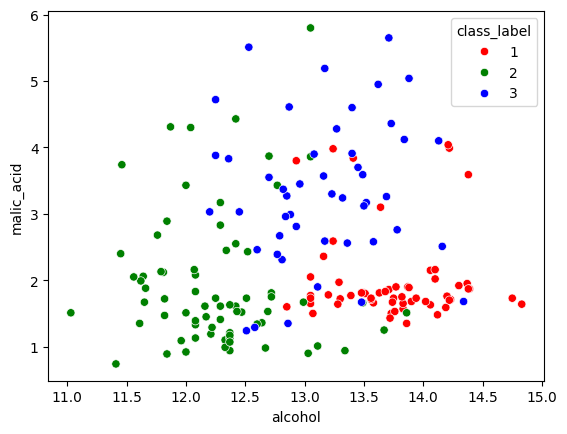

In [33]:

color_dict={1: "red", 2: "green", 3: "blue"}

sns.scatterplot(data=df, x="alcohol", y="malic_acid", hue="class_label", palette=color_dict)

### Now starting normalization process

1. Train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("class_label", axis=1),
                                                    df["class_label"],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Again, you from standardization, that the results are numpy array. We need to convert both of them to dataframes

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Now see the difference between earlier df and scaled df. Look at the min and max values

In [47]:
np.round(X_train.describe(), 1)

,alcohol,malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [48]:
np.round(X_train_scaled.describe(), 1)

,alcohol,malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


<Axes: title={'center': 'After scaling'}, xlabel='alcohol', ylabel='malic_acid'>

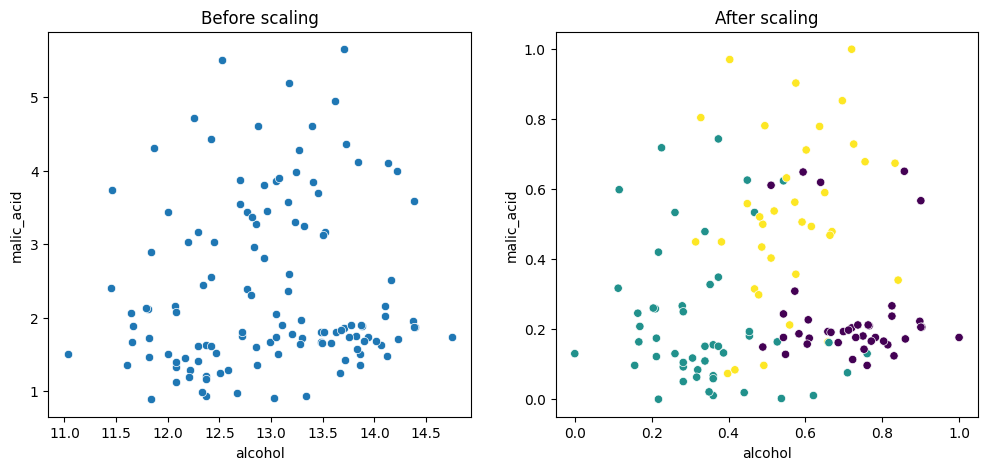

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before scaling")
sns.scatterplot(data=X_train, x="alcohol", y="malic_acid", ax=ax1)

ax2.set_title("After scaling")
sns.scatterplot(data=X_train_scaled, x="alcohol", y="malic_acid",c=y_train, ax=ax2) # used c parameter for colors. dk what is that

### NOTE :
That the data is squished into a unit rectangle. The shape of the data is retained. Just it is squised between 0 to 1

<Axes: title={'center': 'After scaling - pdf of malic acid'}, xlabel='malic_acid', ylabel='Density'>

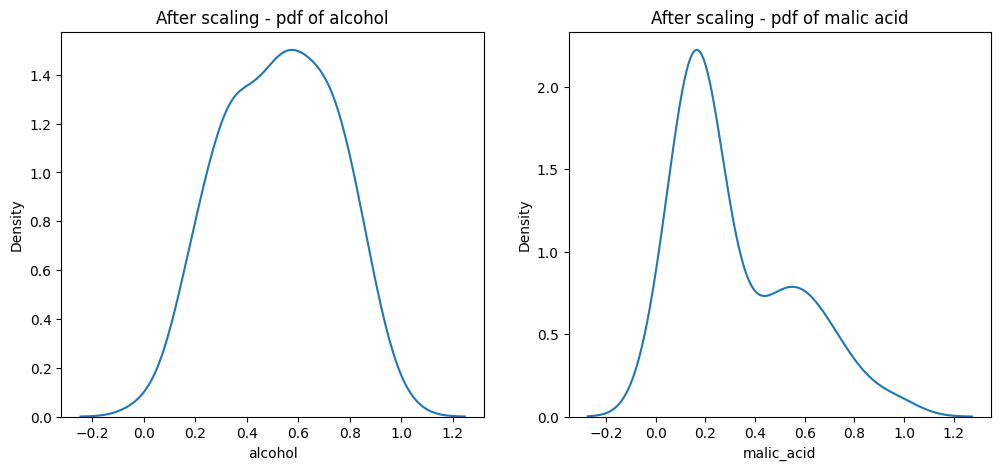

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("After scaling - pdf of alcohol")
sns.kdeplot(X_train_scaled["alcohol"], ax=ax1)

ax2.set_title("After scaling - pdf of malic acid")
sns.kdeplot(X_train_scaled["malic_acid"], ax=ax2)

# NOTE
- The shape of some distribution can be changed. Its not necessary that the shape of every distribution will be retained. Here if you look the shape of pdf of alcohol is little changed before and after scaling</br></br>
- Also there is one more problem that due to squishing the impact of outliers are reduced